In [1]:
#General imports.
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
import os
import scipy

import uproot #https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [20]:
f = r.TFile("./data/gm2offline_ana_version10.root")
twest = f.Get("farline").Get("eventTree")
teast = f.Get("farline").Get("eastTree")
tcomp = f.Get("farline").Get("evwTree")
terr = f.Get("farline").Get("evwNoPartnerTree")

In [21]:
f.cd("farline")
f.ls()

TFile**		./data/gm2offline_ana_version10.root	
 TFile*		./data/gm2offline_ana_version10.root	
  TDirectoryFile*		farline	farline (ReconComparisonEastVsWest) folder
   OBJ: TTree	eventTree	eventTree : 0 at: 0x7fffcff547d0
   OBJ: TTree	eastTree	eastTree : 0 at: 0x7f4094e7a400
   OBJ: TTree	evwTree	evwTree : 0 at: 0x7f4094e75a40
   OBJ: TTree	evwNoPartnerTree	evwNoPartnerTree : 0 at: 0x7f40a6d6ab00
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectoryFile	calo7;1	calo7
   KEY: TDirectoryFile	calo8;1	calo8
   KEY: TDirectoryFile	calo9;1	calo9
   KEY: TDirectoryFile	calo10;1	calo10
   KEY: TDirectoryFile	calo11;1	calo11
   KEY: TDirectoryFile	calo12;1	calo12
   KEY: TDirectoryFile	calo13;1	calo13
   KEY: TDirectoryFile	calo14;1	calo14
   KEY: TDirectoryFile	calo15;1	calo15
   KEY: TDirectoryFile	calo16;1	c

In [22]:
tcomp.Print()

******************************************************************************
*Tree    :evwTree   : evwTree                                                *
*Entries :   200047 : Total =        24890227 bytes  File  Size =   17306796 *
*        :          : Tree compression factor =   1.44                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :   200047 : Total  Size=     802993 bytes  File Size  =       6846 *
*Baskets :       26 : Basket Size=      32000 bytes  Compression= 117.17     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :   200047 : Total  Size=     803083 bytes  File Size  =       6899 *
*Baskets :       26 : Basket Size=      32000 bytes  Compression= 116.28     *
*...................................................

---

Lets first look at the comparison plots

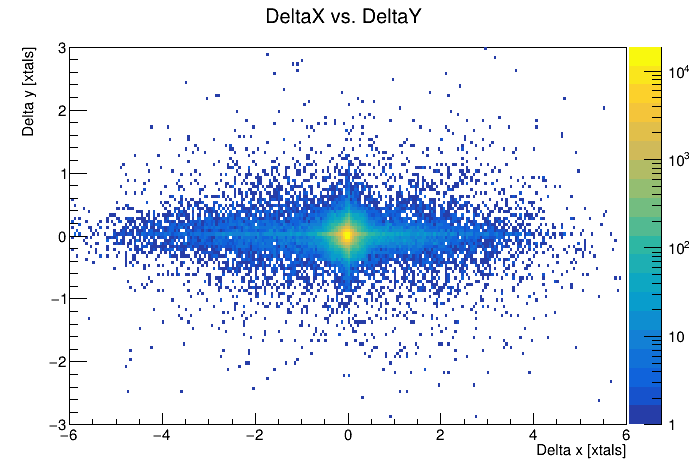

In [23]:
c2 = r.TCanvas()
hdeltaxy = f.Get("farline").Get("evwDeltaXDeltaY").Clone()
hdeltaxy.Draw("COLZ")
hdeltaxy.Rebin2D(5,5)
hdeltaxy.GetXaxis().SetRangeUser(-6,6)
hdeltaxy.GetYaxis().SetRangeUser(-3,3)
c2.SetLogz()
c2.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Info in <TCanvas::SaveAs>: ROOT file ./c3.root has been created


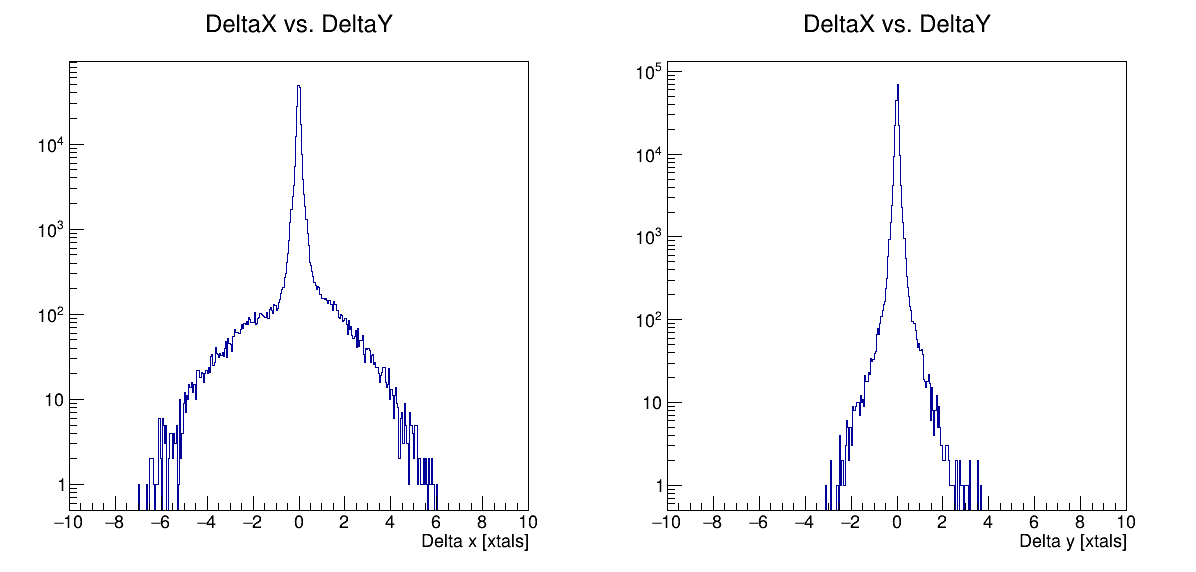

In [24]:
hdeltaxy.GetXaxis().SetRangeUser(-10,10)
hdeltaxy.GetYaxis().SetRangeUser(-10,10)

c3 = r.TCanvas("c3","c3",1200,600)
c3.Divide(2)
c3.cd(1)
r.gPad.SetLogy()
hdeltax = hdeltaxy.ProjectionX().Clone()
hdeltax.Draw()

c3.cd(2)
r.gPad.SetLogy()
hdeltay = hdeltaxy.ProjectionY().Clone()
hdeltay.Draw()

c3.Draw()
c3.Print("./c3.root")

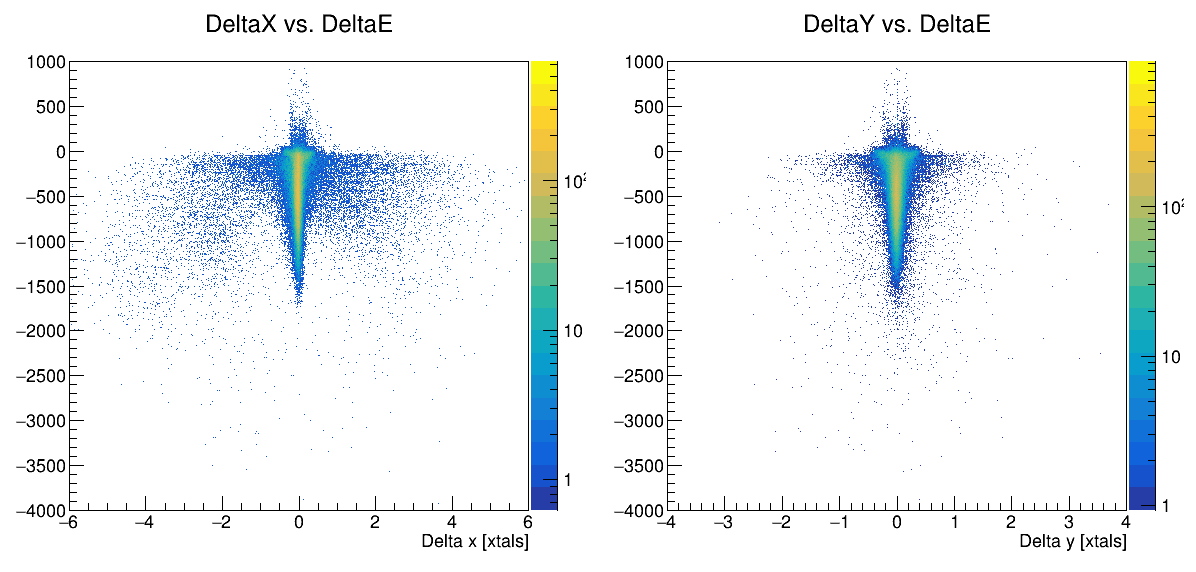

In [25]:
c2 = r.TCanvas("c2","c2",1200,600)
c2.Divide(2)
c2.cd(1)
evwDeltaXDeltaE = f.Get("farline").Get("evwDeltaXDeltaE").Clone()
evwDeltaXDeltaE.Draw("colz")
#evwDeltaXDeltaE.Rebin2D(5,5)
evwDeltaXDeltaE.GetXaxis().SetRangeUser(-6,6)
evwDeltaXDeltaE.GetYaxis().SetRangeUser(-4000,1000)
r.gPad.SetLogz()
c2.cd(2)
evwDeltaYDeltaE = f.Get("farline").Get("evwDeltaYDeltaE").Clone()
evwDeltaYDeltaE.Draw("colz")
#evwDeltaYDeltaE.Rebin2D(5,5)
evwDeltaYDeltaE.GetXaxis().SetRangeUser(-4,4)
evwDeltaYDeltaE.GetYaxis().SetRangeUser(-4000,1000)
r.gPad.SetLogz()
c2.Draw()

---

We can also look at these plot with an energy cut of > 1 GeV, to see if the outliers are primarily in the low energy regime

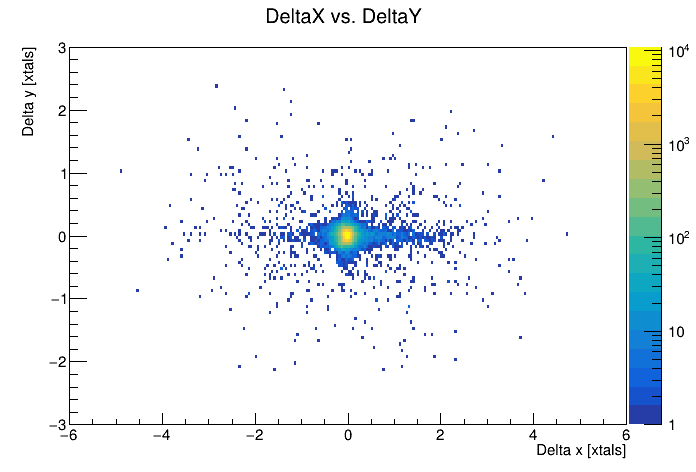

In [18]:
c2 = r.TCanvas()
hcompxy_ecut = hdeltaxy.Clone("hcompxy_ecut")
hcompxy_ecut.Reset()
tcomp.Draw("deltaY:deltaX>>hcompxy_ecut","energyWest > 1000 && energyEast > 1000","goff")
hcompxy_ecut.Draw("colz")

hcompxy_ecut.GetXaxis().SetRangeUser(-6,6)
hcompxy_ecut.GetYaxis().SetRangeUser(-3,3)

c2.SetLogz()
c2.Draw()

Info in <TCanvas::SaveAs>: ROOT file ./c3.root has been created


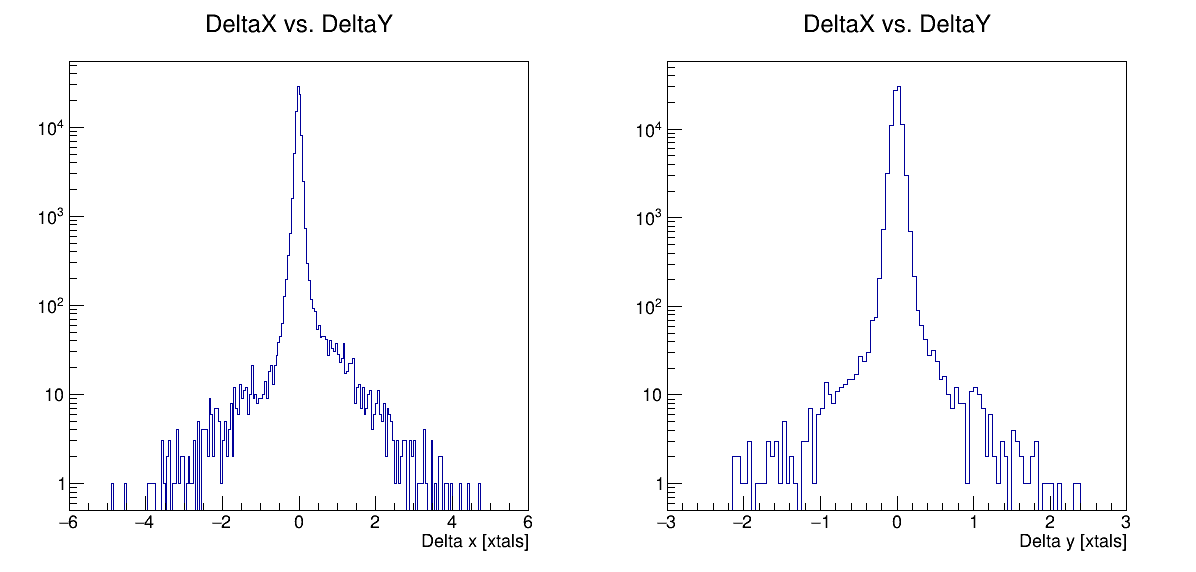

In [19]:
c3 = r.TCanvas("c3","c3",1200,600)
c3.Divide(2)
c3.cd(1)
r.gPad.SetLogy()
hdeltax_ecut = hcompxy_ecut.ProjectionX().Clone()
hdeltax_ecut.Draw()

c3.cd(2)
r.gPad.SetLogy()
hdeltay_ecut = hcompxy_ecut.ProjectionY().Clone()
hdeltay_ecut.Draw()

c3.Draw()
c3.Print("./c3.root")

---


****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =  1.82497e+08
NDf                       =        26512
Edm                       =   6.0662e-12
NCalls                    =           31
p0                        =            0                      	 (fixed)
p1                        =      1.49646   +/-   0.00174981  


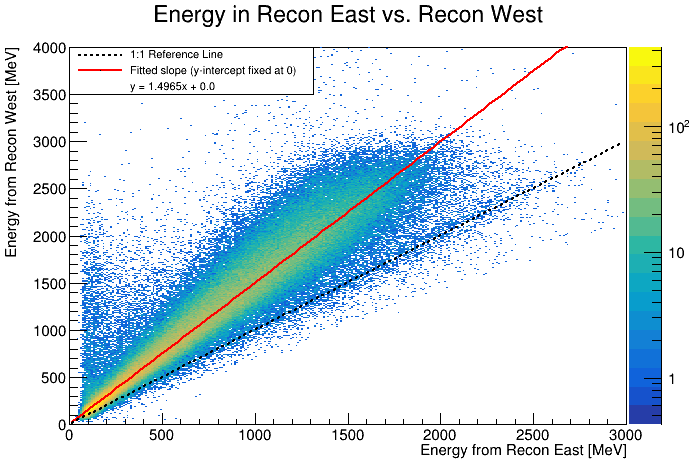

In [8]:
r.gStyle.SetOptFit(0)

c3 = r.TCanvas()
evwEnergyEvW = f.Get("farline").Get("evwEnergyEvW").Clone()
evwEnergyEvW.SetTitle("Energy in Recon East vs. Recon West")
evwEnergyEvW.GetXaxis().SetRangeUser(0,3000)
evwEnergyEvW.GetYaxis().SetRangeUser(0,4000)
evwEnergyEvW.Draw("colz")

onetoone = r.TF1("onetoone","pol1",0,3000)
onetoone.SetParameters(0,1)
onetoone.SetLineStyle(2)
onetoone.SetLineColor(1)
onetoone.Draw("SAME")

actualslope = r.TF1("actualslope","pol1",0,3000)
actualslope.FixParameter(0,0)
evwEnergyEvW.Fit("actualslope","REMB")

leg = r.TLegend(0.1,0.8,0.45,0.9)
leg.AddEntry(onetoone ,"1:1 Reference Line", "l")
leg.AddEntry(actualslope ,"Fitted slope (y-intercept fixed at 0)", "pl")
leg.AddEntry(actualslope ,"y = "+str("%.4f" % round(actualslope.GetParameter(1),4))+"x + "+str(actualslope.GetParameter(0)), "")
leg.Draw()

c3.SetLogz()
c3.Draw()

Lets see if this slope is an especially calorimeter dependent effect

Info in <TCanvas::SaveAs>: ROOT file ./c5.root has been created


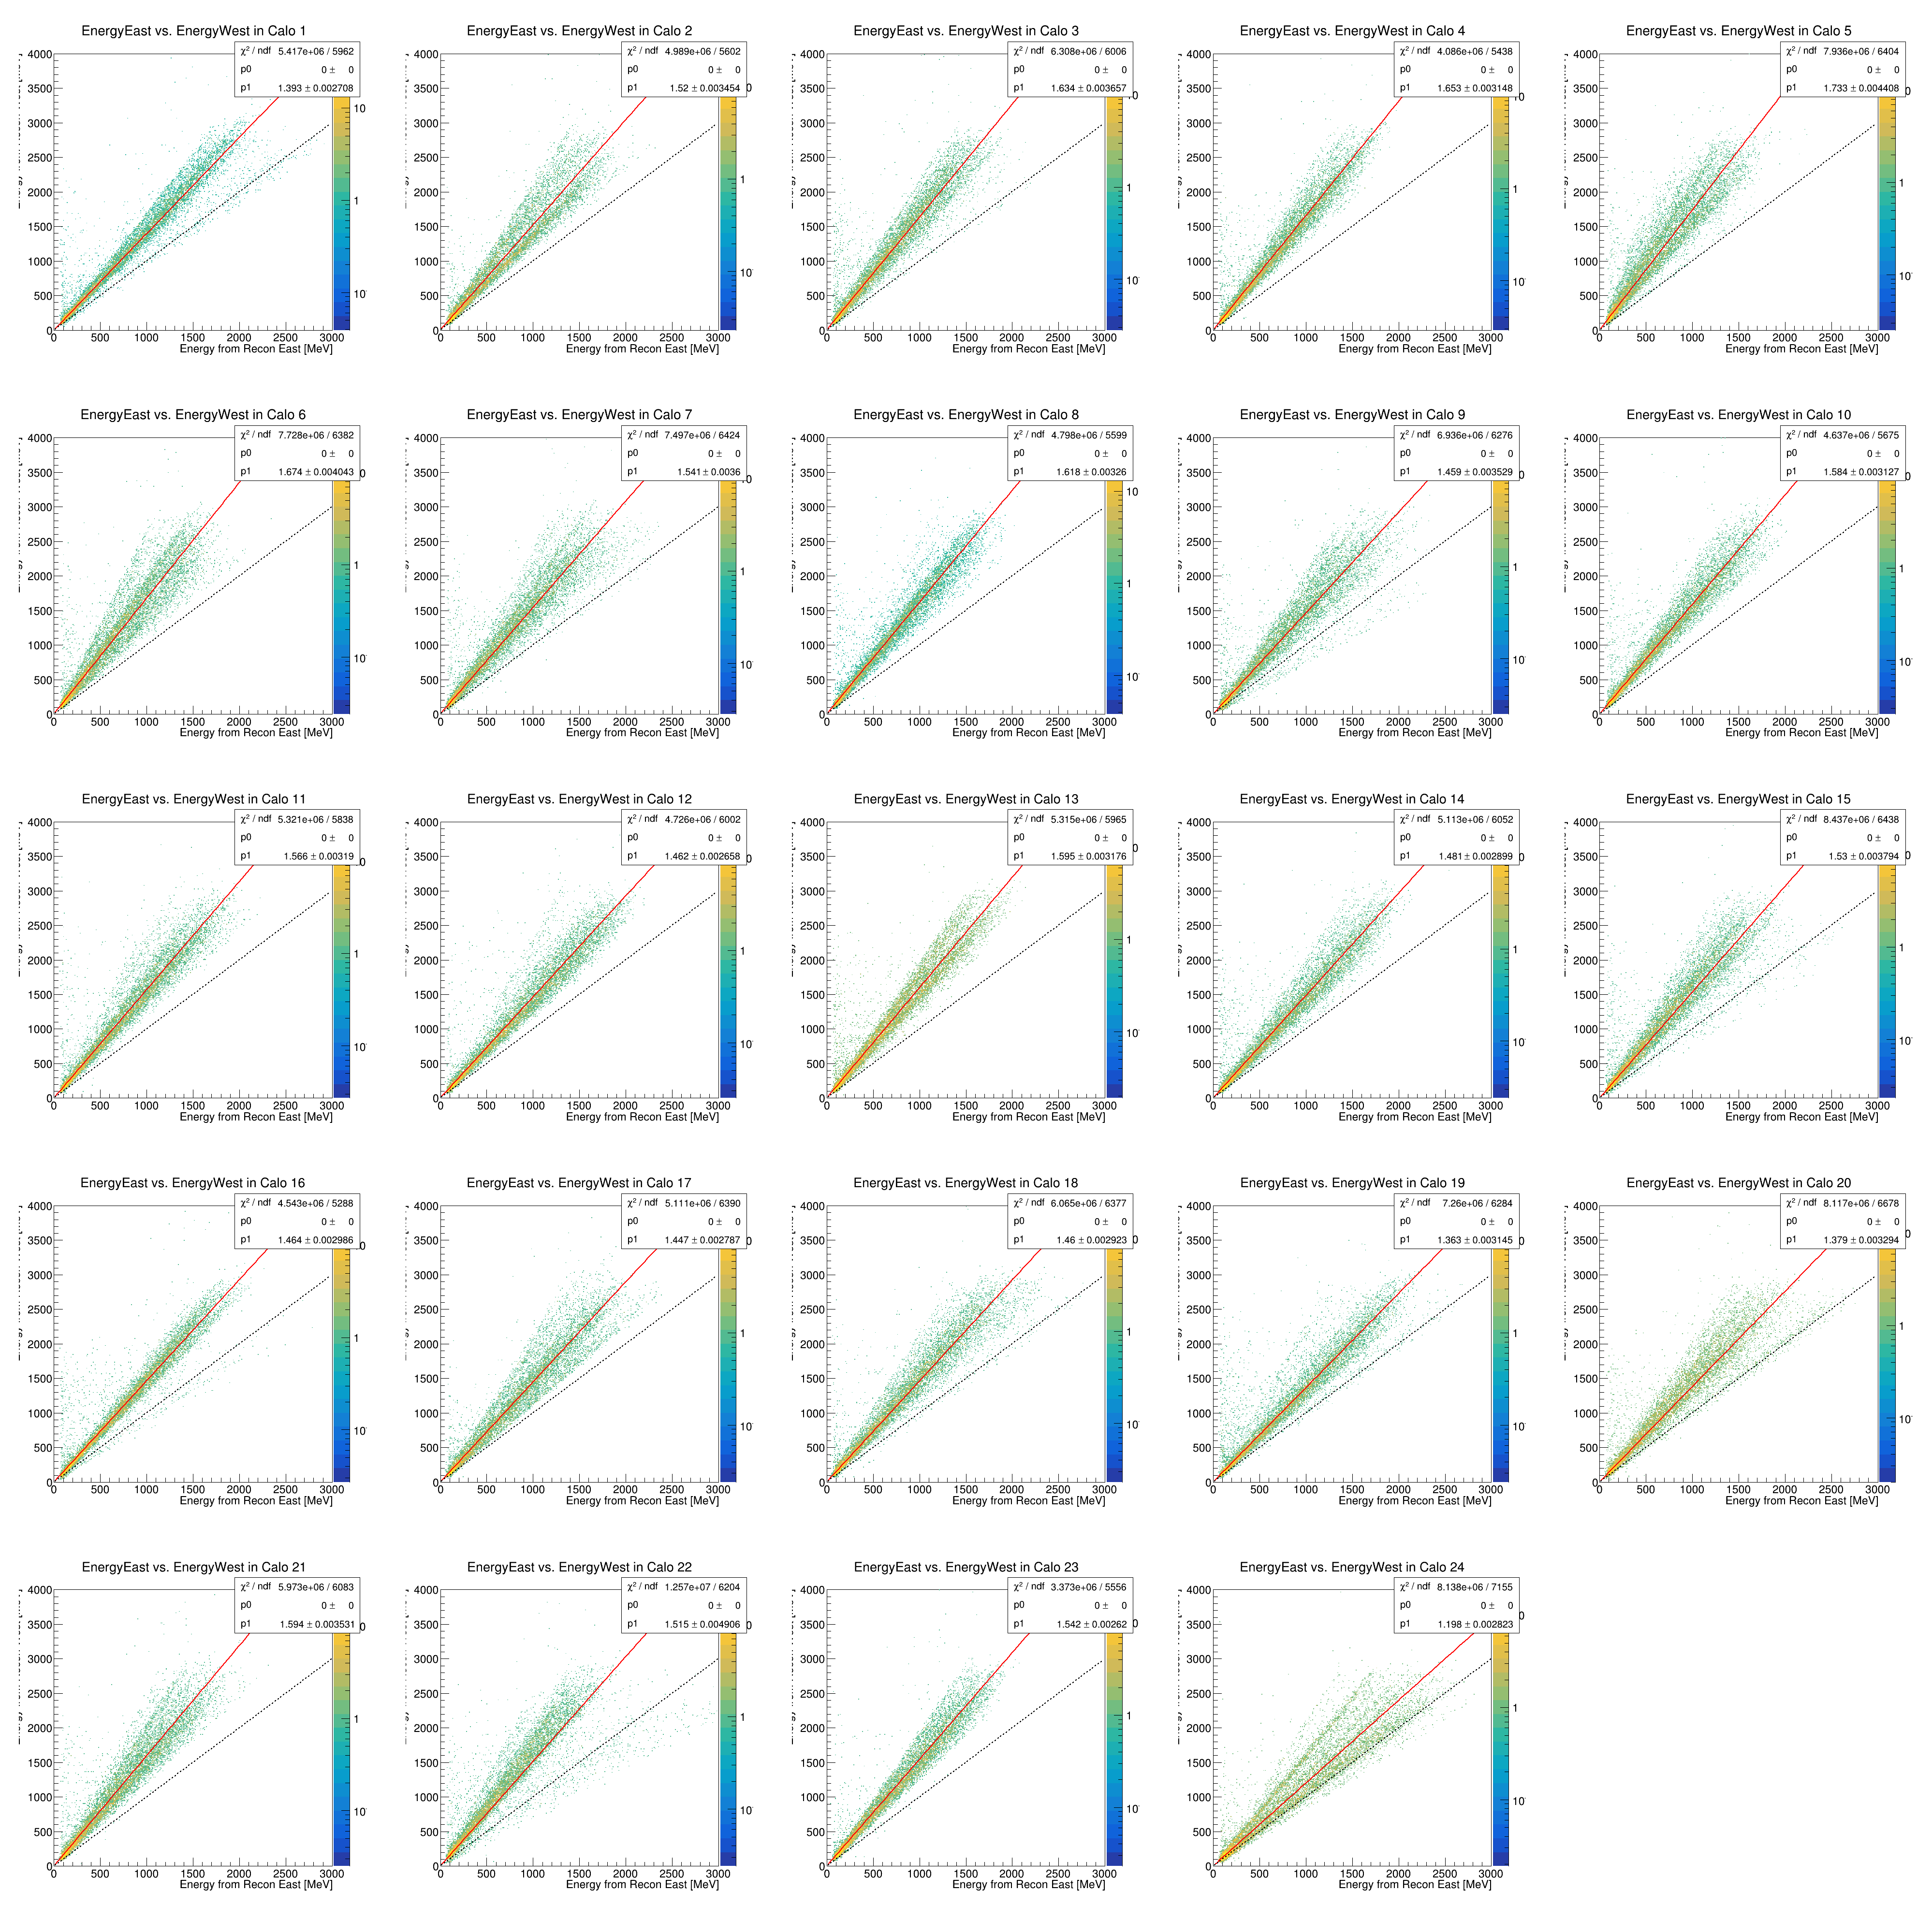

In [9]:
r.gStyle.SetOptFit(1)

evwEnergyEvWvec = []
for calo in range(1,25):
    evwEnergyEvW_i = f.Get("farline").Get("evw_calo"+str(calo)).Get("evwEnergyEvW").Clone()
    evwEnergyEvWvec.append( evwEnergyEvW_i.Clone( "h"+str(calo) ) )
    
c5 = r.TCanvas("c5","c5",4000,4000)
c5.Divide(5,5)

actualslope_i = r.TF1("actualslope_i","pol1",0,3000)
actualslope_i.FixParameter(0,0)

slopeVec = []

for i, hist in enumerate(evwEnergyEvWvec):
    c5.cd(i+1)
    r.gPad.SetLogz()
    #hist.Rebin2D(5,5)
    hist.GetXaxis().SetRangeUser(0,3000)
    hist.GetYaxis().SetRangeUser(0,4000)
    
    hist.Fit("actualslope_i","REMBQ")
    hist.Draw("COLZ")
    onetoone.Draw("SAME")
    
    slopeVec.append(actualslope_i.GetParameter(1))
    
c5.Draw()
c5.Print("./c5.root")

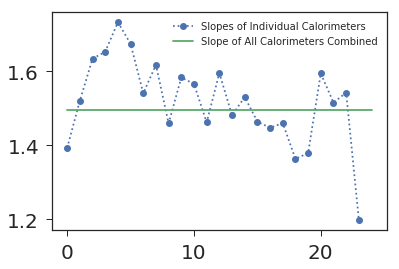

In [10]:
plt.plot(slopeVec,'o:',label='Slopes of Individual Calorimeters')
plt.plot([0,24],[actualslope.GetParameter(1),actualslope.GetParameter(1)], label='Slope of All Calorimeters Combined')
plt.legend()
plt.show()

In [11]:
deltaTVec = []
for calo in range(1,25):
    evwDeltaTCaloAfterCorr = f.Get("farline").Get("evwDeltaTCaloAfterCorr").Clone()
    evwDeltaTCaloAfterCorr.GetYaxis().SetRangeUser(calo,calo+1)
    evwDeltaTCaloAfterCorr.Draw("COLZ")

    evwDeltaTAfterCorr = evwDeltaTCaloAfterCorr.ProjectionX().Clone()
    evwDeltaTAfterCorr.GetXaxis().SetRangeUser(-.6,.6)
    evwDeltaTAfterCorr.SetTitle("Calo "+str(calo))
    evwDeltaTAfterCorr.GetXaxis().SetTitle("$\Delta t$ ~[c.t.]")
    evwDeltaTAfterCorr.Draw()

    deltaTVec.append( evwDeltaTAfterCorr.Clone("h"+str(calo)) )

<input>:10: DeprecationWarning: invalid escape sequence \D
<ipython-input-11-d9540331c4f7>:10: DeprecationWarning: invalid escape sequence \D
  evwDeltaTAfterCorr.GetXaxis().SetTitle("$\Delta t$ ~[c.t.]")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3


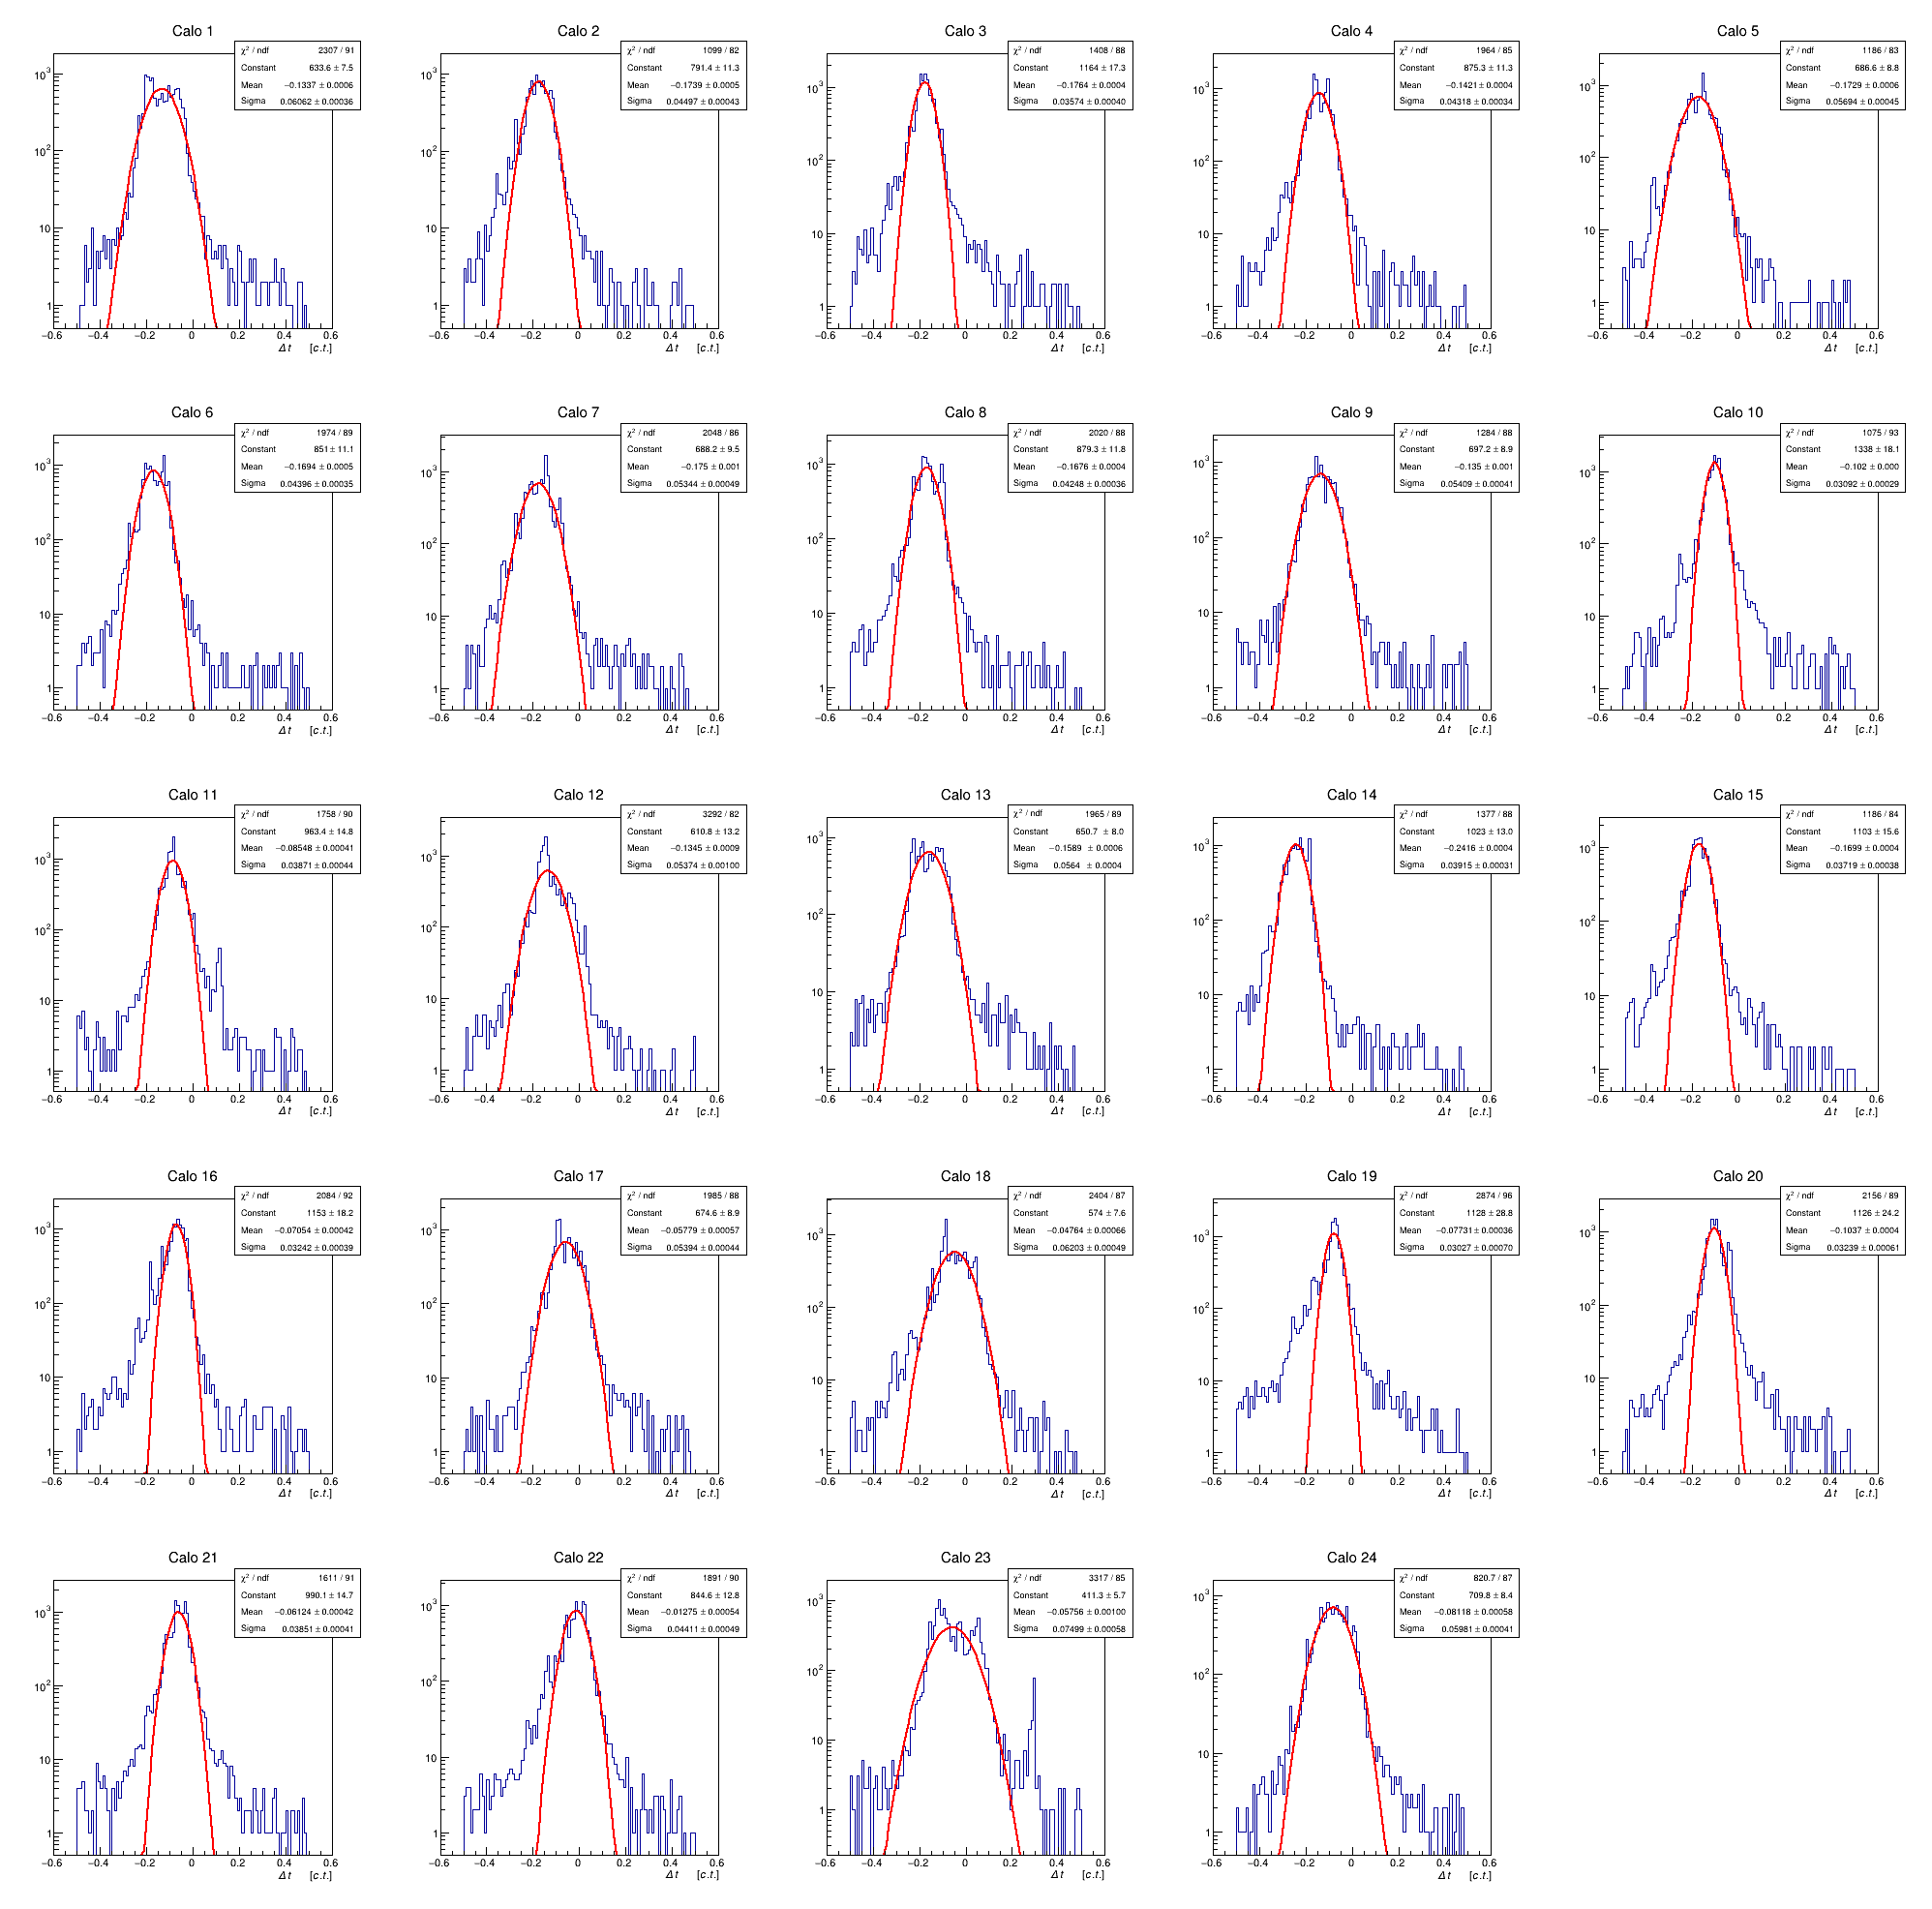

In [62]:
c3 = r.TCanvas("c3","c3",2000,2000)
c3.Divide(5,5)
for i in range(24):
    c3.cd(i+1)
    r.gPad.SetLogy()
    deltaTVec[i].Draw()
    deltaTVec[i].Fit("gaus","EBMQ")
c3.Draw()

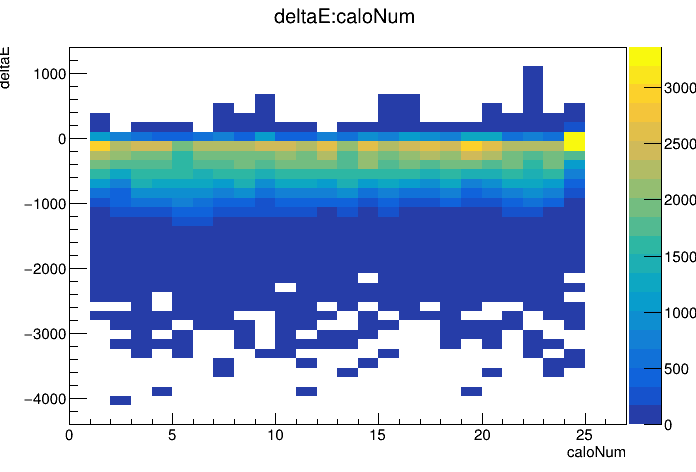

In [67]:
c = r.TCanvas()
tcomp.Draw("deltaE:caloNum","","colz")
c.Draw()

---

Ok, now lets transform this into a dataframe and look at it using some of the python libraries

In [3]:
file = uproot.open("./data/gm2offline_ana_version3.root")
tree = file["farline/evwTree"]

In [4]:
df = tree.pandas.df()
df['timeEastCorrected'] = df['timeEast'] - df['timeCorr']
df.columns = ["runNum","subRunNum","fill","island","caloNum","timeEast","timeWest","deltaT","westX",
                "westY", "eastX","eastY","deltaX","deltaY","energyEast","energyWest","deltaE","timeCorr",
                "timeEastCorrected"]
df.describe()

,runNum,subRunNum,fill,island,caloNum,timeEast,timeWest,deltaT,westX,westY,eastX,eastY,deltaX,deltaY,energyEast,energyWest,deltaE,timeCorr,timeEastCorrected
count,270608.0,270608.0,270608.000000,270608.000000,270608.000000,270608.000000,270608.000000,270608.000000,270608.000000,270608.000000,270608.000000,270608.000000,270608.000000,270608.000000,270608.000000,270608.000000,270608.000000,270608.000000,270608.000000
mean,16368.0,427.0,102.273140,91.969461,12.507712,59837.295807,59838.014300,-0.718492,3.878108,3.032465,3.878108,3.032465,-0.009046,0.000395,773.125883,1188.600596,-415.474713,-0.596103,59837.891910
std,0.0,0.0,58.164483,45.192120,6.920073,51212.049687,51212.048070,0.841236,2.625518,1.286921,2.625518,1.286921,0.513557,0.151067,484.734467,721.705903,317.495509,0.833075,51212.048449
min,16368.0,427.0,2.000000,0.000000,1.000000,9008.430868,9008.662702,-2.849512,0.500000,0.500000,0.500000,0.500000,-6.467684,-3.142834,39.759016,28.933722,-4044.649415,-2.352000,9008.584868
25%,16368.0,427.0,52.000000,55.000000,7.000000,23262.320369,23263.152621,-0.946740,1.500000,2.099072,1.500000,2.099072,-0.066285,-0.039681,348.523297,557.628749,-610.103822,-0.861000,23263.011834
50%,16368.0,427.0,103.000000,93.000000,13.000000,43906.909622,43907.376984,-0.528183,3.528909,3.065911,3.528909,3.065911,-0.009084,0.000000,726.003658,1138.227888,-363.586484,-0.370000,43907.254413
75%,16368.0,427.0,154.000000,127.000000,18.000000,79696.140919,79696.347312,-0.139107,6.038246,4.012314,6.038246,4.012314,0.037477,0.040301,1132.298240,1744.309381,-160.786493,0.052000,79696.258669
max,16368.0,427.0,201.000000,226.000000,24.000000,534897.648141,534900.050249,1.201228,8.500000,5.500000,8.500000,5.500000,7.034869,3.684061,3997.863241,5602.227313,1042.723708,0.707000,534899.903141


In [5]:
dflite = df.sample(n=100,random_state=123456789)
dflite.head()

,runNum,subRunNum,fill,island,caloNum,timeEast,timeWest,deltaT,westX,westY,eastX,eastY,deltaX,deltaY,energyEast,energyWest,deltaE,timeCorr,timeEastCorrected
6965,16368,427,6,146,1,86357.777126,86360.014960,-2.237835,1.845493,2.753588,1.845493,2.753588,-0.013741,-0.055014,1620.779830,2323.533439,-702.753610,-2.052,86359.829126
193716,16368,427,145,37,9,18990.016045,18990.766660,-0.750615,2.794817,2.207591,2.794817,2.207591,0.025557,-0.004028,1140.594616,1888.227067,-747.632451,-0.542,18990.558045
236374,16368,427,177,76,12,24329.875361,24330.806911,-0.931550,3.727885,4.629520,3.727885,4.629520,0.027787,-0.004724,1110.590750,1849.432831,-738.842082,-0.779,24330.654361
269618,16368,427,201,46,18,37426.201991,37427.119112,-0.917120,6.427653,4.328593,6.427653,4.328593,-0.036945,0.032035,1001.485364,1567.682617,-566.197253,-0.945,37427.146991
19285,16368,427,13,155,22,106695.368237,106695.435799,-0.067563,1.476037,4.985168,1.476037,4.985168,-0.663324,0.066785,564.529803,974.519073,-409.989270,0.000,106695.368237


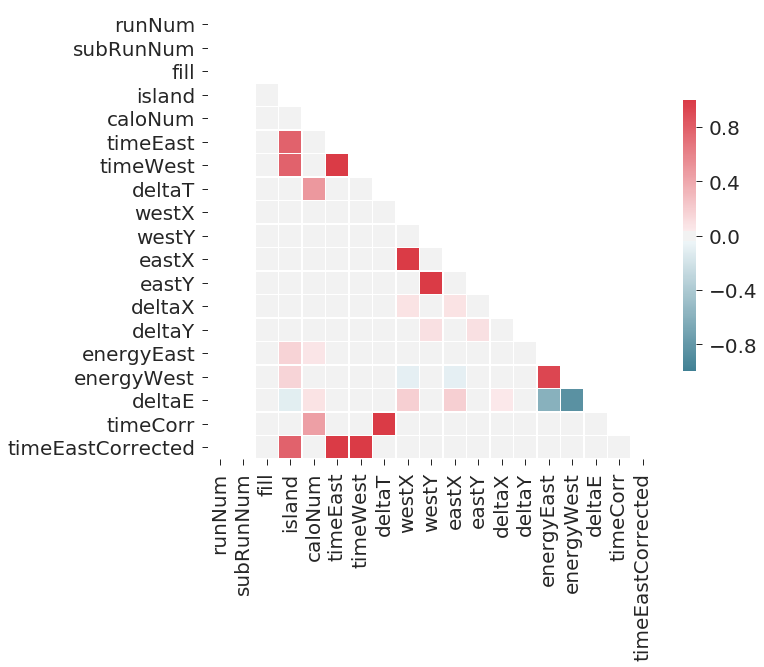

In [9]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap=plt.cm.viridis

# Draw the heatmap with the mask and correct aspect ratio
#, mask=mask
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, mask=mask)

plt.show()

/home/jlab/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/jlab/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/jlab/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1481: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/jlab/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/home/jlab/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/home/jlab/anaconda3/lib/python3.6/site-packages/matplotlib/conto

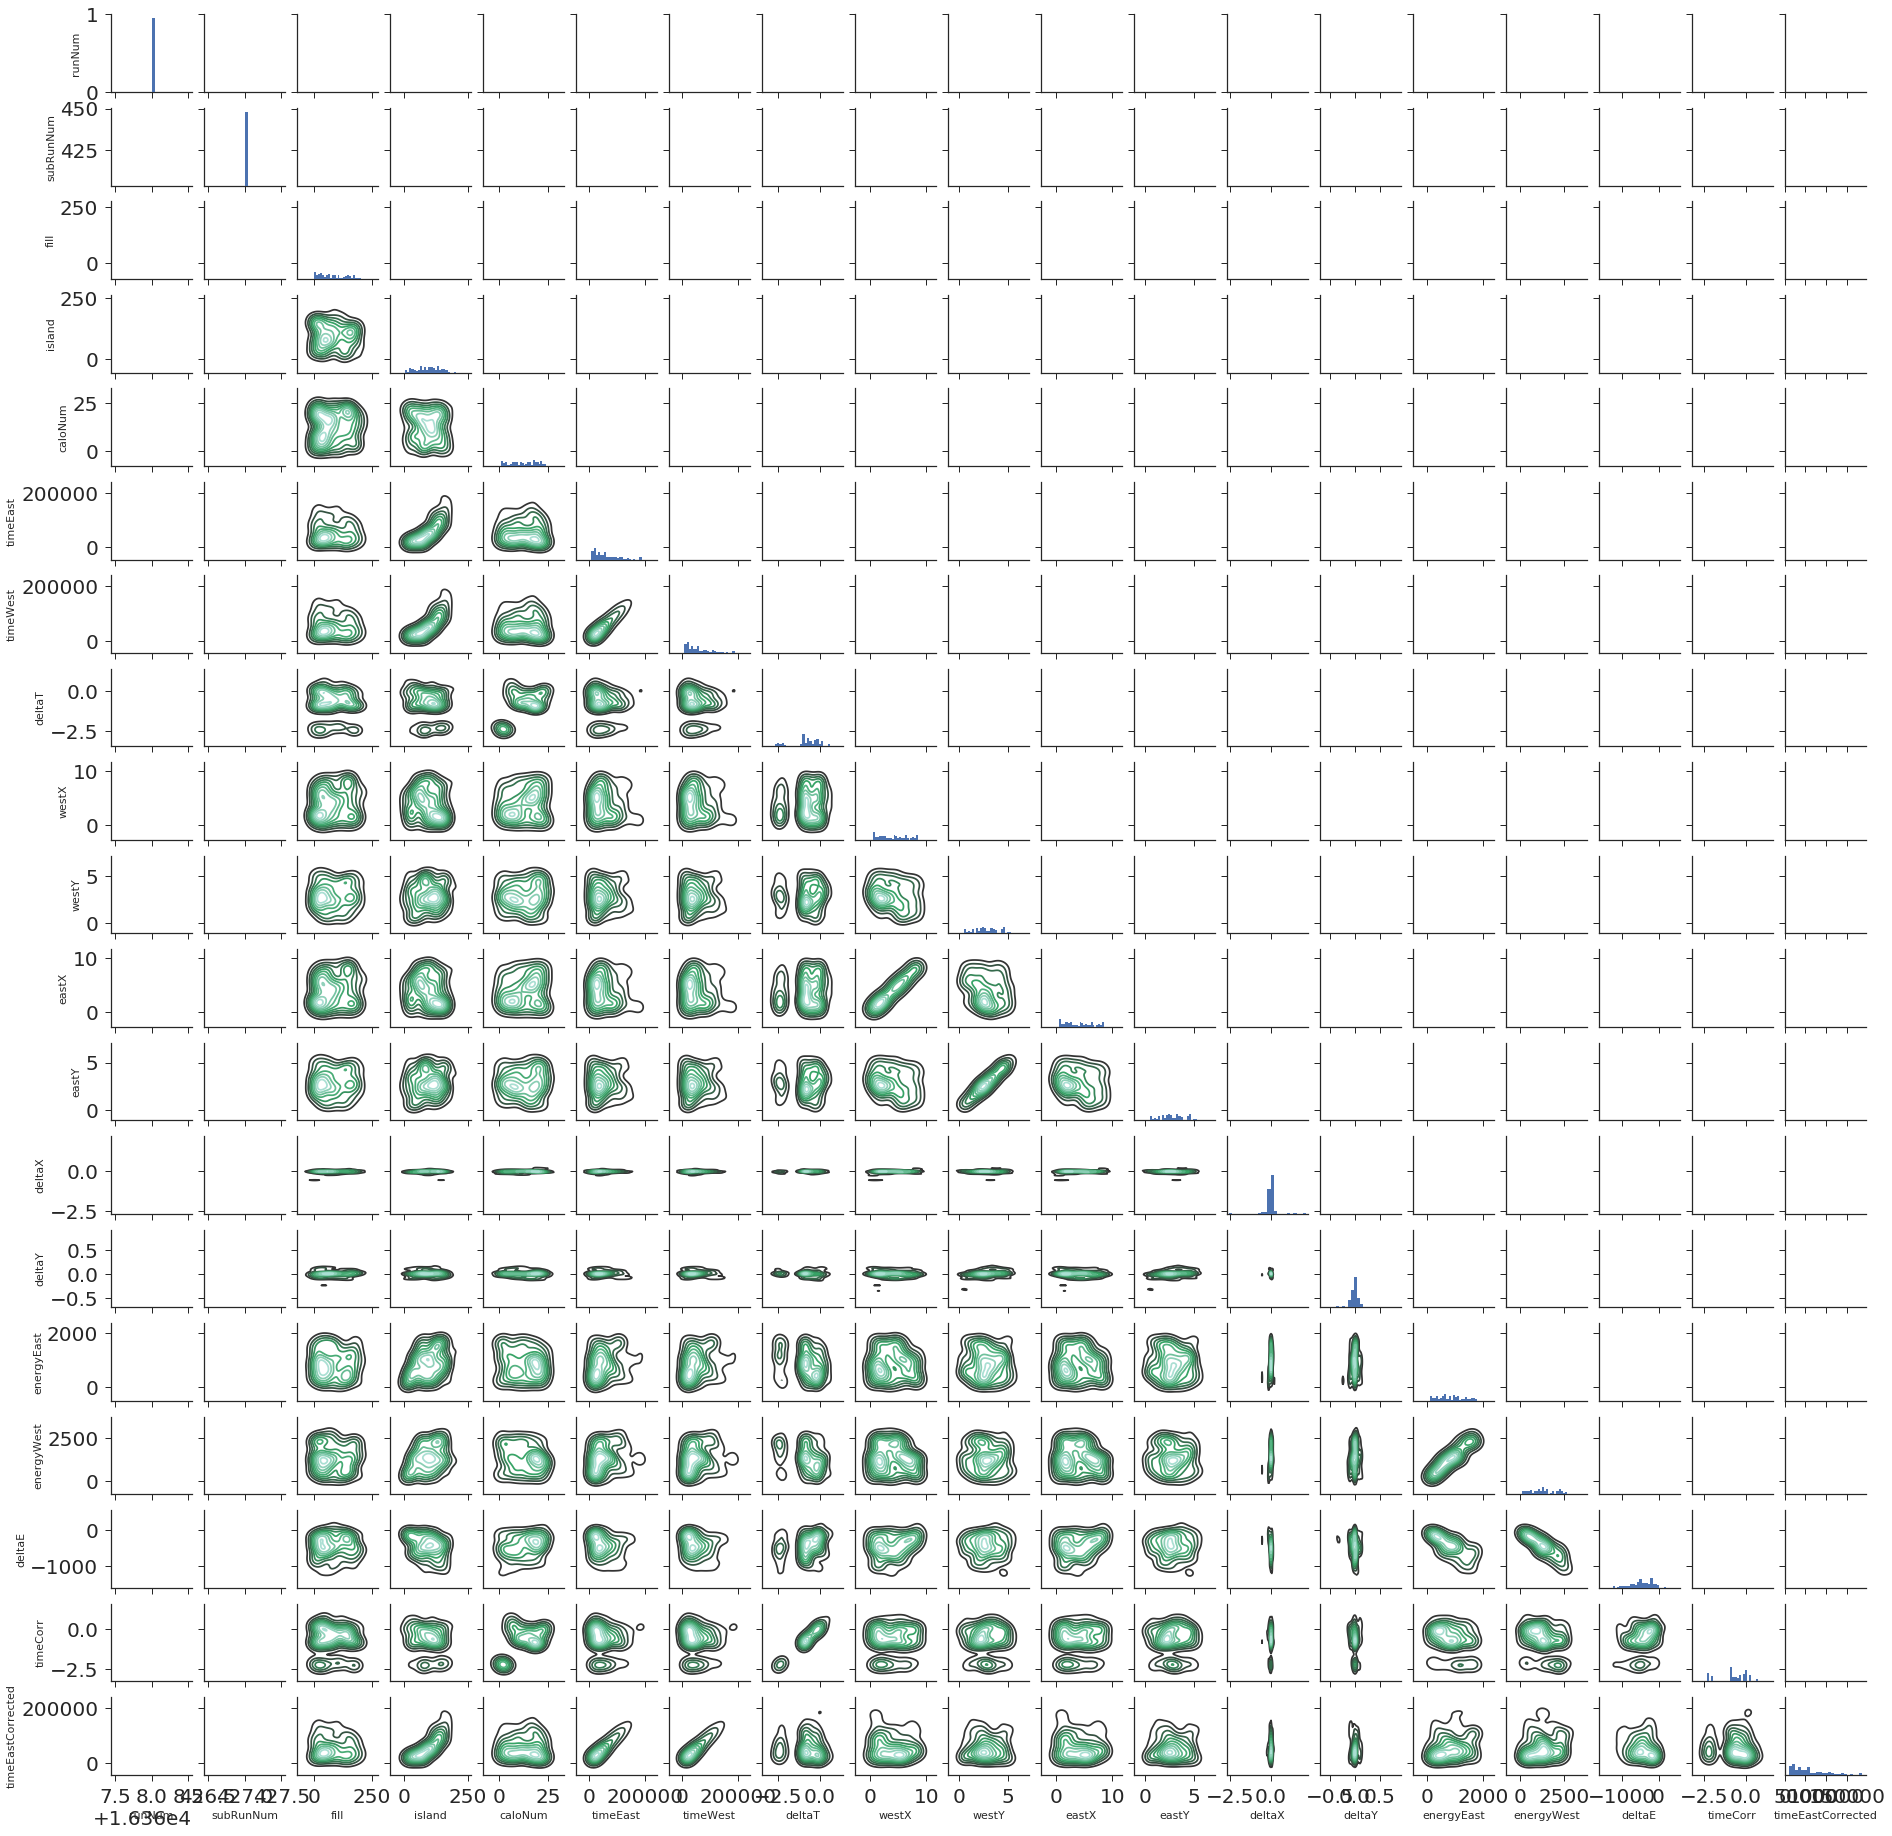

In [63]:
g = sns.PairGrid(dflite)
#g.map_diag(plt.hist, bins=20)

def pairgrid_heatmap(x, y, **kws):
    cmap = sns.light_palette(kws.pop("color"), as_cmap=True)
    plt.hist2d(x, y, cmap=cmap, cmin=1, **kws)

#g.map_offdiag(pairgrid_heatmap, bins=20, norm=matplotlib.colors.LogNorm())

g.map_diag(plt.hist,bins=24)
g.map_lower(sns.kdeplot)

g.fig.set_size_inches(25,25)

--- 

Now lets take a look at the recon east clusters for which no corresponding recon west cluster could be found

In [111]:
terr.Print()

******************************************************************************
*Tree    :evwNoPartnerTree: evwNoPartnerTree                                       *
*Entries :     3474 : Total =          215438 bytes  File  Size =     113036 *
*        :          : Tree compression factor =   1.88                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :     3474 : Total  Size=      14470 bytes  File Size  =        190 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=  73.58     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :     3474 : Total  Size=      14485 bytes  File Size  =        192 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=  72.83     *
*.............................................

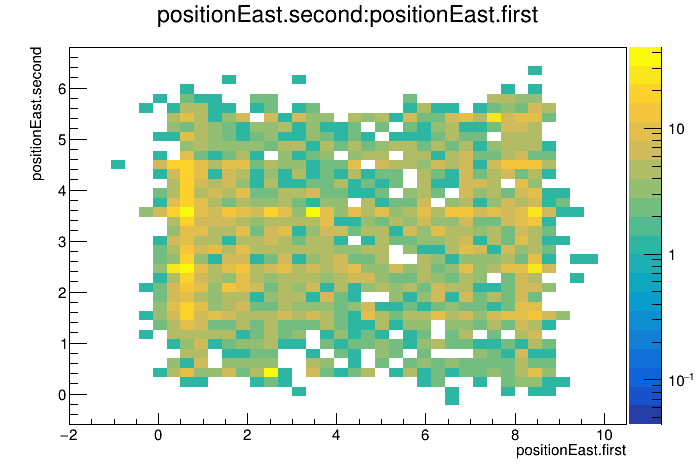

In [112]:
c = r.TCanvas()
terr.Draw("positionEast.second:positionEast.first","","colz")
c.SetLogz()
c.Draw()

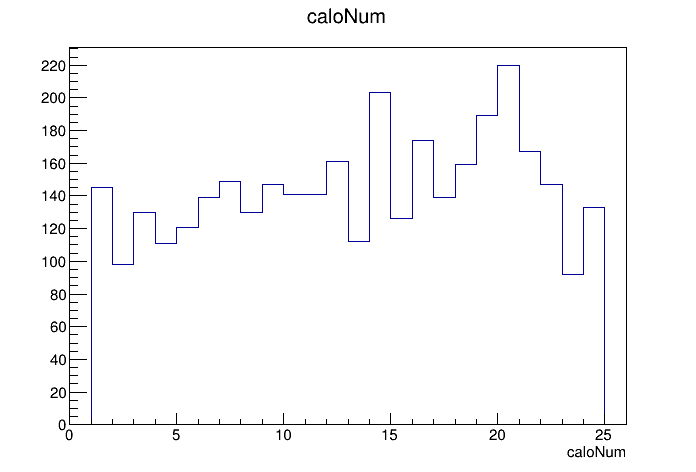

In [157]:
c = r.TCanvas()
terr.Draw("caloNum","","colz")
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: heast (Potential memory leak).


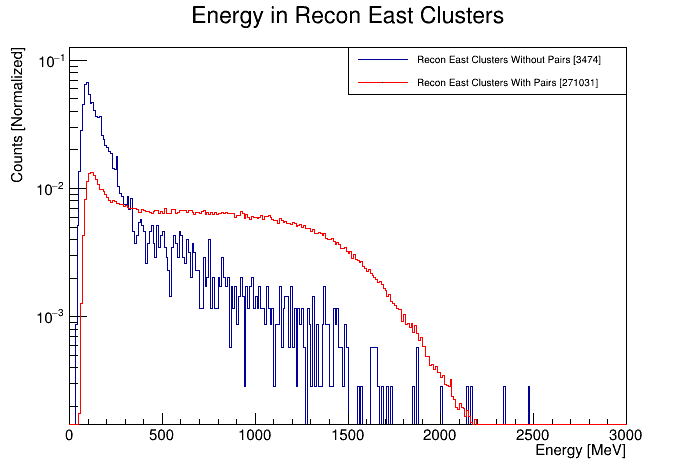

In [136]:
c = r.TCanvas()
heast = r.TH1D("heast","Energy in Recon East Clusters; Energy [MeV]; Counts [Normalized]",300,0,3000)
hall = heast.Clone("hall")

terr.Draw("energyEast>>heast","","goff")
heast.Scale(1/(heast.GetEntries()))
heast.Draw("HIST")

tcomp.Draw("energyEast>>hall","","goff")
hall.Scale(1/(hall.GetEntries()))
hall.SetLineColor(2)
hall.Draw("HIST SAME")

leg = r.TLegend(0.5,0.8,0.9,0.9)
leg.AddEntry(heast ,"Recon East Clusters Without Pairs ["+str(int(heast.GetEntries()))+"]", "l")
leg.AddEntry(hall ,"Recon East Clusters With Pairs ["+str(int(hall.GetEntries()))+"]", "pl")
leg.Draw()

c.SetLogy()
c.Draw()

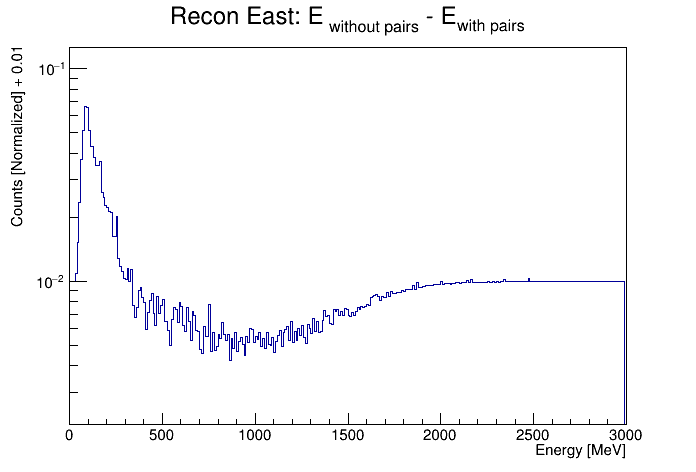

In [156]:
jackknife = heast.Clone("jackknife")
jackknife.Add(hall,-1)


for bin in range(int(jackknife.GetNbinsX())):
    content = jackknife.GetBinContent(bin)
    jackknife.SetBinContent(bin,content+.01) #SHIFT IT UPWARDS SO THAT WE CAN PUT IT ON A LOG SCALE
    
c = r.TCanvas()
c.SetLogy()
jackknife.SetTitle("Recon East: E_{without pairs} - E_{with pairs}")
jackknife.GetYaxis().SetTitle("Counts [Normalized] + 0.01")
jackknife.Draw("HIST")
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: herrxy (Potential memory leak).


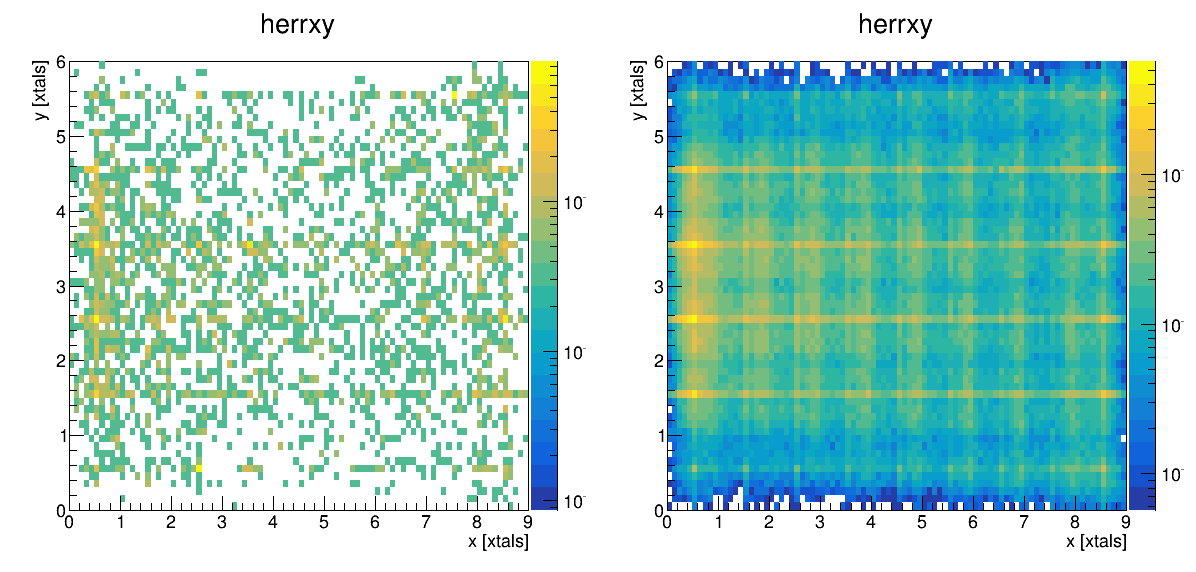

In [169]:
c = r.TCanvas("c","c",1200,600)
c.Divide(2)

c.cd(1)
herrxy = r.TH2D("herrxy","herrxy; x [xtals]; y [xtals]",90,0,9,60,0,6)
hcompxy = herrxy.Clone("hcompxy")
terr.Draw("positionEast.second:positionEast.first>>herrxy","","goff")
herrxy.Draw("COLZ")
herrxy.Scale(1/(herrxy.GetEntries()))
r.gPad.SetLogz()

c.cd(2)
tcomp.Draw("positionEast.second:positionEast.first>>hcompxy","","goff")
hcompxy.Scale(1/(hcompxy.GetEntries()))
hcompxy.Draw("COLZ")
r.gPad.SetLogz()

c.Draw()

5400


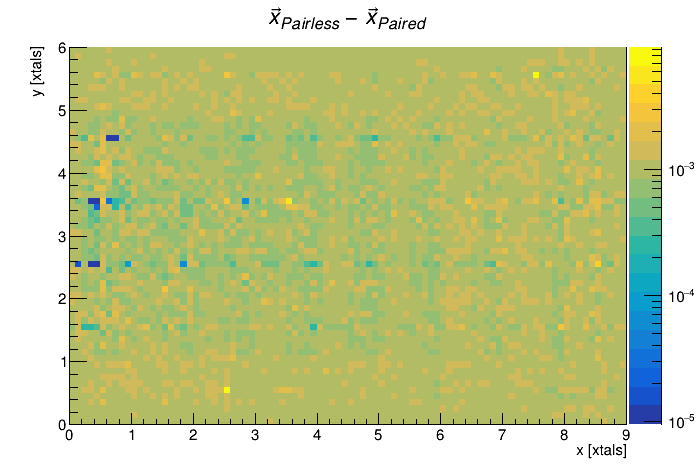

In [208]:
jackknifeXY = herrxy.Clone("jackknifeXY")
jackknifeXY.Add(hcompxy,-1)

bins = (int(jackknifeXY.GetNbinsX())) * (int(jackknifeXY.GetNbinsY()))
print(bins)


for binx in range(int(jackknifeXY.GetNbinsX())):
    for biny in range( int(jackknifeXY.GetNbinsY()) ):
        bin = jackknifeXY.GetBin(binx+1,biny+1)
        content = jackknifeXY.GetBinContent(bin)
        jackknifeXY.SetBinContent(bin,content+0.001) #SHIFT IT UPWARDS SO THAT WE CAN PUT IT ON A LOG SCALE

c = r.TCanvas()
jackknifeXY.Draw("COLZ")
jackknifeXY.SetTitle("$\\vec{x}_{Pairless} - \\vec{x}_{Paired}$")
c.SetLogz()
c.Draw()

In [105]:
file = uproot.open("./data/gm2offline_ana_version5.root")
terr1 = file["farline/evwNoPartnerTree"]

In [106]:
df = terr1.pandas.df()
df.describe()

,runNum,subRunNum,fill,island,caloNum,timeEast,first,second,energyEast,timeCorr
count,3474.0,3474.0,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000,3474.000000
mean,16368.0,427.0,104.371042,88.766839,12.996546,54750.719516,4.124041,3.055135,290.081793,-0.685204
std,0.0,0.0,57.495750,41.655074,6.706121,63416.790257,2.882638,1.397130,310.935686,0.786980
min,16368.0,427.0,2.000000,0.000000,1.000000,9015.437295,-0.950320,-0.092867,36.838017,-2.533535
25%,16368.0,427.0,54.000000,57.000000,7.000000,18372.777468,1.344141,2.009727,104.563431,-0.955093
50%,16368.0,427.0,107.000000,82.000000,14.000000,34333.756593,3.685804,3.141383,163.317933,-0.539326
75%,16368.0,427.0,156.000000,120.000000,19.000000,64805.950528,6.936521,4.121379,320.025766,-0.184445
max,16368.0,427.0,201.000000,211.000000,24.000000,533692.210301,9.809008,6.320001,2475.622874,0.543326


In [103]:
dflite = df[['fill','island','caloNum','first','second','energyEast']]
#d = sns.pairplot(dflite)
#plt.show()

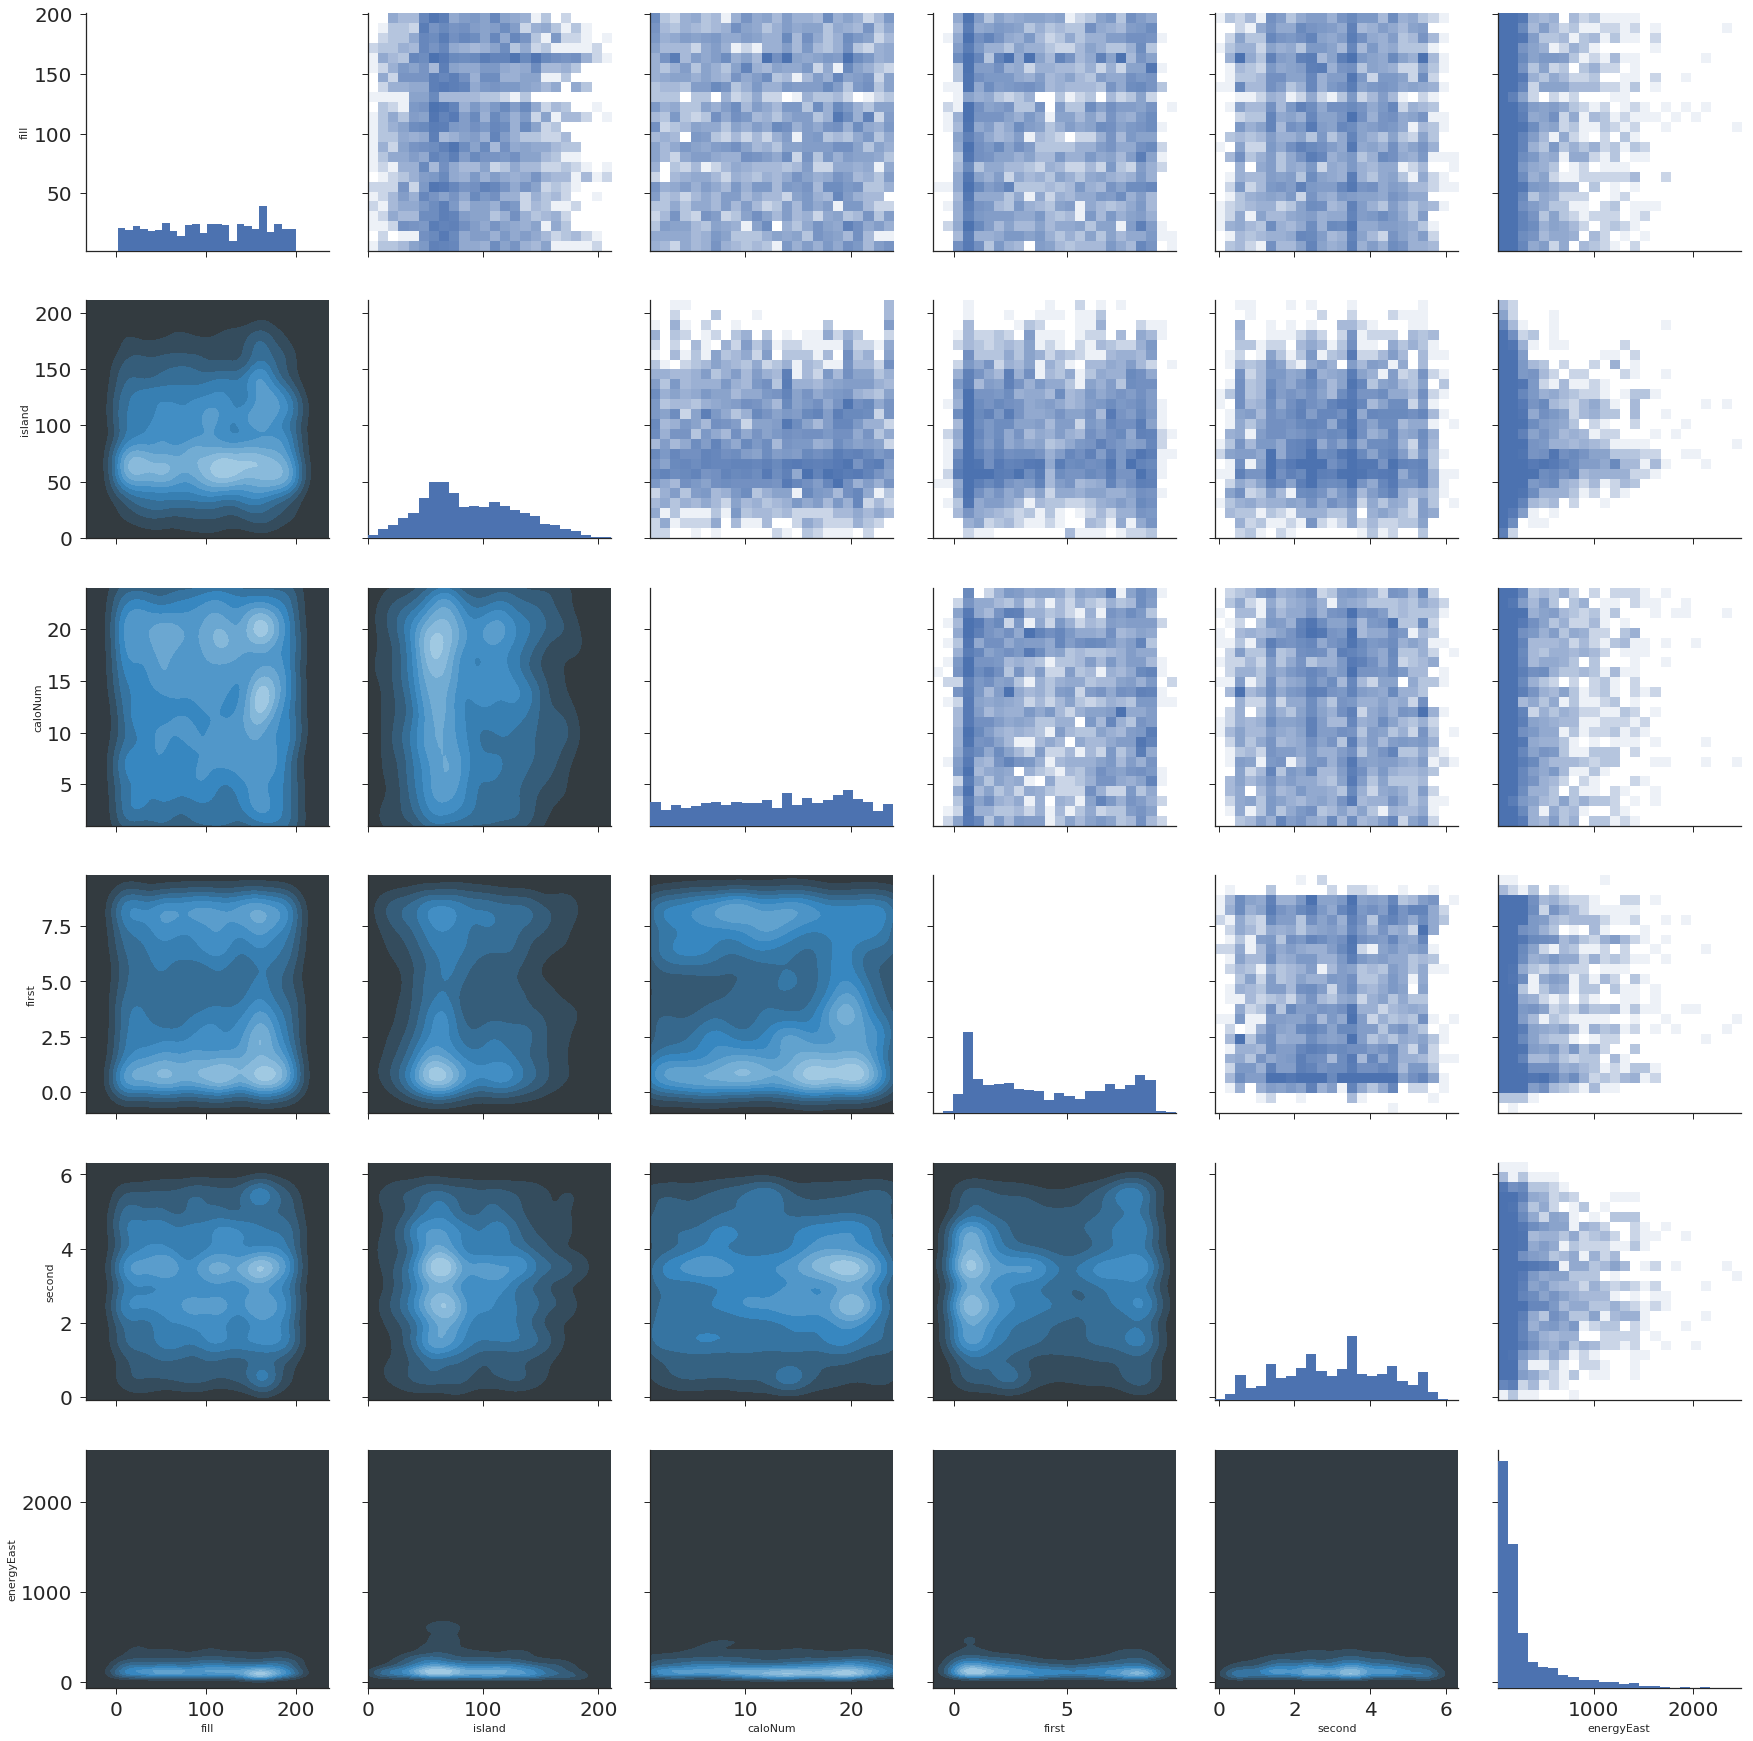

In [102]:
g = sns.PairGrid(dflite)
#g.map_diag(plt.hist, bins=20)

def pairgrid_heatmap(x, y, **kws):
    cmap = sns.light_palette(kws.pop("color"), as_cmap=True)
    plt.hist2d(x, y, cmap=cmap, cmin=1, **kws)

#g.map_offdiag(pairgrid_heatmap, bins=20, norm=matplotlib.colors.LogNorm())

g.map_diag(plt.hist,bins=24)
g.map_lower(sns.kdeplot, cmap="Blues_d",shade=True)

def pairgrid_heatmap(x, y, **kws):
    cmap = sns.light_palette(kws.pop("color"), as_cmap=True)
    plt.hist2d(x, y, cmap=cmap, cmin=1, **kws)

g.map_upper(pairgrid_heatmap, bins=24, norm=matplotlib.colors.LogNorm())

g.fig.set_size_inches(25,25)
plt.show()